<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/08_Prove_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 28x28 image 60000 instances - train image
# 28x28 image 10000 instances - test image
train_images.shape, test_images.shape 

((60000, 28, 28), (10000, 28, 28))

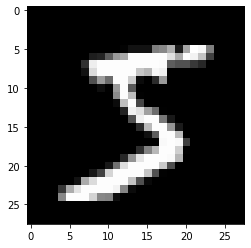

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap = "gray")

In [ ]:
train_labels, test_labels

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [ ]:
# change the data as 2 mimensional format and implement standization by dividing 255 (0 ~ 255)
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_images, test_images

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [ ]:
# change the target class as metrics so that it is shaped as (# of instances, # of class)
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size = 32)

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1504 - accuracy: 0.9572
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1361 - accuracy: 0.9606
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1252 - accuracy: 0.9641
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1166 - accuracy: 0.9668
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.1098 - accuracy: 0.9682


In [ ]:
history = model.fit(train_images, train_labels, epochs= 20, validation_data= (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.1044 - accuracy: 0.9701 - val_loss: 0.1310 - val_accuracy: 0.9657
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0994 - accuracy: 0.9716 - val_loss: 0.1500 - val_accuracy: 0.9599
Epoch 3/20
60000/60000 [==============================] - 3s 42us/step - loss: 0.0959 - accuracy: 0.9728 - val_loss: 0.1273 - val_accuracy: 0.9652
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0921 - accuracy: 0.9747 - val_loss: 0.1279 - val_accuracy: 0.9657
Epoch 5/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.0885 - accuracy: 0.9754 - val_loss: 0.1363 - val_accuracy: 0.9650
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0855 - accuracy: 0.9760 - val_loss: 0.1411 - val_accuracy: 0.9648
Epoch 7/20
60000/60000 [==============================] - 2s 39us/st

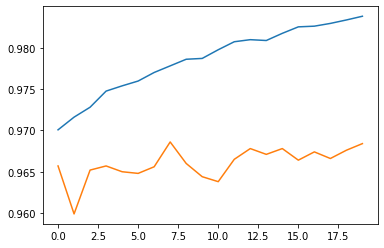

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

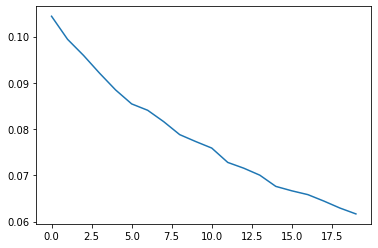

In [ ]:
plt.plot(history.history["loss"])

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(' test_acc: ', test_acc, "\n", 'test loss: ', test_loss)

10000/10000 [==============================] - 0s 17us/step
 test_acc:  0.9652000069618225 
 test loss:  0.1290582473371178
